In [2]:
import pandas as pd
import seaborn as sns

In [5]:
dataset=pd.read_csv("preprocessed_thyroid_data.csv")

In [6]:
dataset

,Age,Gender,Country,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,89,Male,Japan,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,72,Female,Nigeria,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,85,Female,Brazil,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [7]:
dataset.columns

Index(['Age', 'Gender', 'Country', 'Family_History', 'Radiation_Exposure',
       'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'TSH_Level',
       'T3_Level', 'T4_Level', 'Nodule_Size', 'Thyroid_Cancer_Risk',
       'Diagnosis'],
      dtype='object')

In [16]:
dataset.isnull().sum()

Age                    0
Gender                 0
Country                0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

# ===> No Null Values

# UNIVARIATE ANALYSIS

In [8]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        if(dataset[columnName].dtype=='O'):
            qual.append(columnName)
        else:
            quan.append(columnName)
    return quan,qual

In [9]:
quan,qual=quanQual(dataset)

In [10]:
qual

['Gender',
 'Country',
 'Family_History',
 'Radiation_Exposure',
 'Iodine_Deficiency',
 'Smoking',
 'Obesity',
 'Diabetes',
 'Thyroid_Cancer_Risk',
 'Diagnosis']

In [11]:
quan

['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

In [28]:
# Now we need to check whether we have an Outlier.

desc=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","Q4:100%","IQR","1.5rule","Lesser","Greater","Min","Max","Skew","Kurtosis"],columns= quan)
for columnName in quan:
    desc[columnName]["Mean"]=dataset[columnName].mean()
    desc[columnName]["Median"]=dataset[columnName].median()
    desc[columnName]["Mode"]=dataset[columnName].mode()[0]
    desc[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    desc[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    desc[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    desc[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
    desc[columnName]["IQR"]=desc[columnName]["Q3:75%"]- desc[columnName]["Q1:25%"]
    desc[columnName]["1.5rule"]=1.5*desc[columnName]["IQR"]
    desc[columnName]["Lesser"]=desc[columnName]["Q1:25%"]-1.5*desc[columnName]["IQR"]
    desc[columnName]["Greater"]=desc[columnName]["Q3:75%"]+1.5*desc[columnName]["IQR"]
    desc[columnName]["Min"]=dataset[columnName].min()
    desc[columnName]["Max"]= dataset[columnName].max()
    desc[columnName]["Skew"]= dataset[columnName].skew()
    desc[columnName]["Kurtosis"]= dataset[columnName].kurtosis()
desc

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
Mean,51.918497,5.045102,2.001727,8.246204,2.503403
Median,52.0,5.04,2.0,8.24,2.51
Mode,72,9.9,1.27,10.67,0.69
Q1:25%,33.0,2.57,1.25,6.37,1.25
Q2:50%,52.0,5.04,2.0,8.24,2.51
Q3:75%,71.0,7.52,2.75,10.12,3.76
Q4:100%,89.0,10.0,3.5,12.0,5.0
IQR,38.0,4.95,1.5,3.75,2.51
1.5rule,57.0,7.425,2.25,5.625,3.765
Lesser,-24.0,-4.855,-1.0,0.745,-2.515


<Axes: xlabel='Age', ylabel='Count'>

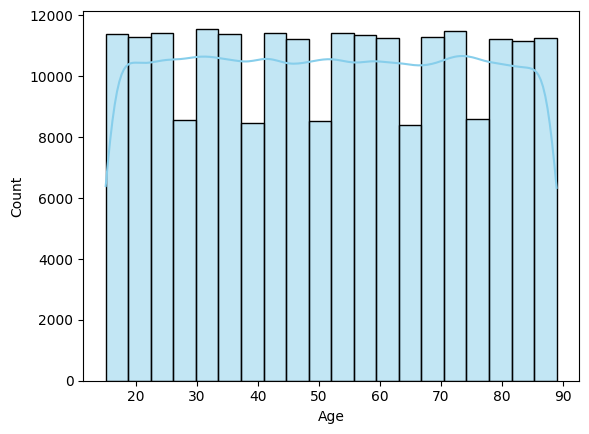

In [22]:
sns.histplot(dataset["Age"],kde=True, bins=20, color='skyblue')

<Axes: xlabel='TSH_Level', ylabel='Count'>

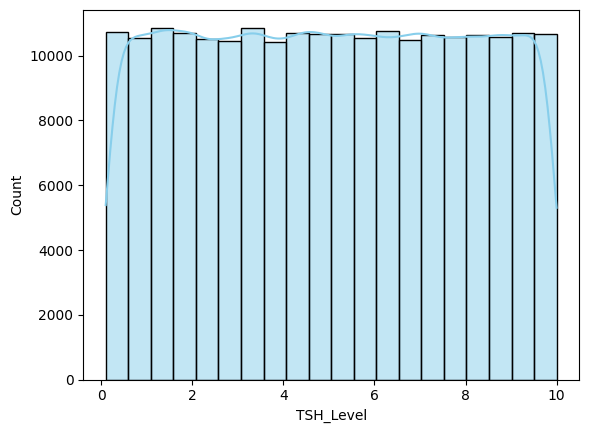

In [23]:
sns.histplot(dataset["TSH_Level"],kde=True, bins=20, color='skyblue')

<Axes: xlabel='T3_Level', ylabel='Count'>

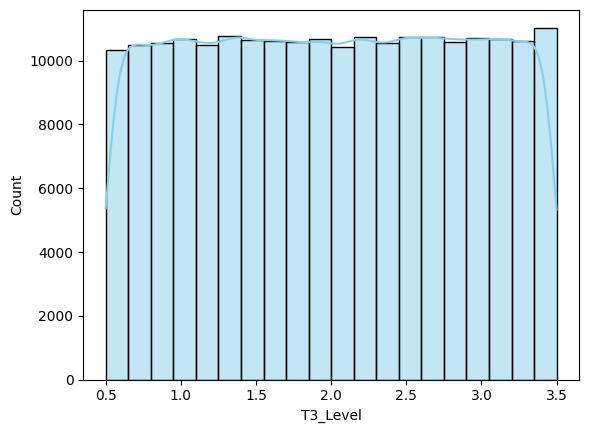

In [24]:
sns.histplot(dataset["T3_Level"],kde=True, bins=20, color='skyblue')

<Axes: xlabel='T4_Level', ylabel='Count'>

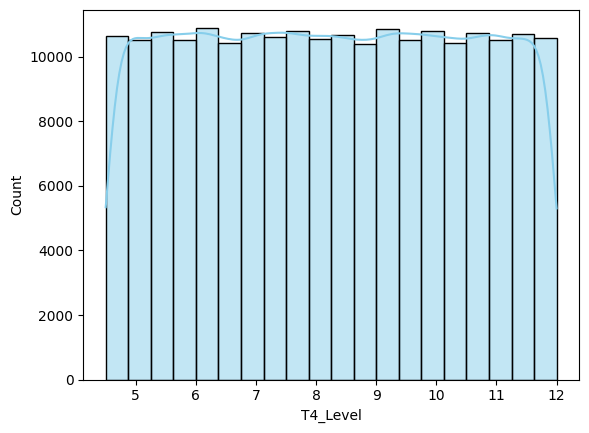

In [25]:
sns.histplot(dataset["T4_Level"],kde=True, bins=20, color='skyblue')

<Axes: xlabel='Nodule_Size', ylabel='Count'>

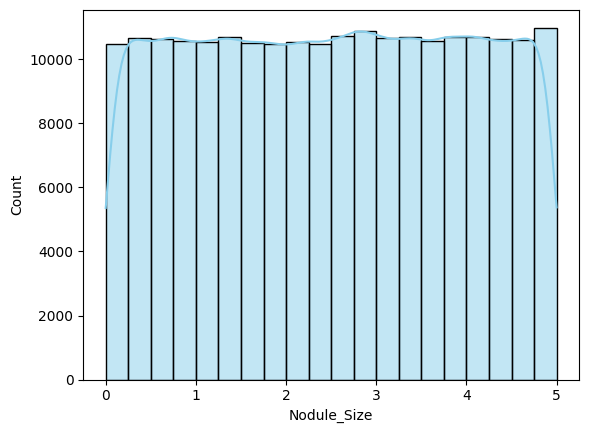

In [26]:
sns.histplot(dataset["Nodule_Size"],kde=True, bins=20, color='skyblue')

In [13]:
lesser=[]
greater=[]

for columnName in quan:
    if(desc[columnName]["Min"]<desc[columnName]["Lesser"]):
        lesser.append(columnName)
    if(desc[columnName]["Max"]>desc[columnName]["Greater"]):
        greater.append(columnName)

In [14]:
lesser

[]

In [15]:
greater

[]

# ===> No Outliers

# BIVARIATE ANALYSIS

# 1. Malignant Patients count

In [29]:
#1) How many patients are diagnosed as Benign/Malignant?
# To find this we can use Value counts. It will give the frequency of unique values 

In [30]:
dataset['Diagnosis'].value_counts()

Benign       163196
Malignant     49495
Name: Diagnosis, dtype: int64

# 2. Reason for Malignant?

In [31]:
# 2)Find the reason for Malignant from the dataset

In [32]:
Benign = dataset[dataset['Diagnosis'] == 'Benign']
Malignant = dataset[dataset['Diagnosis'] == 'Malignant']

In [33]:
comparison = dataset.groupby('Diagnosis')[['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']].mean()
print(comparison)

                 Age  TSH_Level  T3_Level  T4_Level  Nodule_Size
Diagnosis                                                       
Benign     51.917124   5.049307  2.002866  8.244755     2.505518
Malignant  51.923023   5.031236  1.997971  8.250981     2.496432


In [34]:
# The mean values are nearly same for both Benign and Malignant cases.

# 3. Relation between Nodule size and T4_Level?

In [35]:
# 3)What kind of relation between Nodule size and T4_Level?

In [36]:
# To find the relation between two columns we can use correlation
dataset.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17756\1065441729.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
Age,1.000000,-0.000925,-0.001013,-0.002373,-0.001489
TSH_Level,-0.000925,1.000000,0.000335,-0.000795,0.000416
T3_Level,-0.001013,0.000335,1.000000,-0.004069,-0.001799
T4_Level,-0.002373,-0.000795,-0.004069,1.000000,-0.001860
Nodule_Size,-0.001489,0.000416,-0.001799,-0.001860,1.000000


In [37]:
#The correlation values between all numeric features are very close to 0, which means there is no significant linear relationship between them.

# 4. Nodule size increase with age?

In [38]:
# 4) Does Nodule size increase with age?

In [40]:
# To find the relation between two columns we can use correlation
# dataset.corr()
# From above table we can see correlation value -0.0014 - There is no linear relationship.
# Nodule size does not increase / decrease with age.

# 5. People with TSH_Level Not in Normal range?

In [47]:
# 5) How many people are there with TSH_Level Not in Normal range?

In [46]:
# filtering TSH_Level column and assigning it to above  
not_normal = dataset[(dataset['TSH_Level'] > 4.0) | (dataset['TSH_Level'] < 0.4)]
#shape[0] will give the no. of rows in the not_normal
# Count the number of patients
count = not_normal.shape[0]
count

135182

In [48]:
# 135182 patients are not having normal TSH_Level

# 6. Hypothesis Testing

In [49]:
#  6)Test the Analysis of Variance between T4_Level and Diagnosis at signifance level 5%.(Make decision using Hypothesis Testing)

In [ ]:
# dataset

In [57]:
# Here we are using oneway ANAVO 
import scipy.stats as stats

# Split the data into groups
benign = dataset[dataset['Diagnosis'] == 'Benign']['T4_Level']
malignant = dataset[dataset['Diagnosis'] == 'Malignant']['T4_Level']

f_stat, p_value = stats.f_oneway(benign, malignant)

print("F-statistic:",f_stat)
print("P-value:",p_value)


F-statistic: 0.31424652168996675
P-value: 0.5750865561425021


In [58]:
#Conclusion

#if pvalue is < 0.05 we reject Null hypothesis
#if pvalue is > 0.05 we accept Null hypothesis (fail to reject)

#Here pvalue - 0.57 which is > than 0.05 ---> we are accepting Null hypothesis
#hence there is no significant difference between T4_Level and Diagnosis of patients. 

# 7. T-Test

In [59]:
# 7)Test the similarity between “Diagnosis (Benign & Malignant)” with respect to “TSH_Level” at a significance level of 5%. 
# Make decision using Hypothesis testing.

In [60]:
# Diagnosis(Benign) and Diagnosis(Malignant) patients - TSH_Level
#Different group same condition
#Independednt Sample - Unpaired Ttest

In [62]:
from scipy.stats import ttest_ind

benign_pat= dataset[dataset['Diagnosis']=='Benign']['TSH_Level']
malignant_pat= dataset[dataset['Diagnosis']=='Malignant']['TSH_Level']

ttest_ind(benign_pat, malignant_pat)

TtestResult(statistic=1.2312780727577617, pvalue=0.21822024145469007, df=212689.0)

In [63]:
#if pvalue is < 0.05 we reject Null hypothesis
#if pvalue is > 0.05 we accept Null hypothesis
#Here pvalue - 0.218 which is > than 0.05 ---> Hence we fail to reject Null hypothesis

#hence there is no significant difference between Diagnosis(Benign) and Diagnosis(Malignant) patients with respect to TSH_Level

# 8. Converting Normal distribution to Std Normal distribution

In [64]:
# 8) Convert the normal distribution to standard normal distribution for T3_Level column

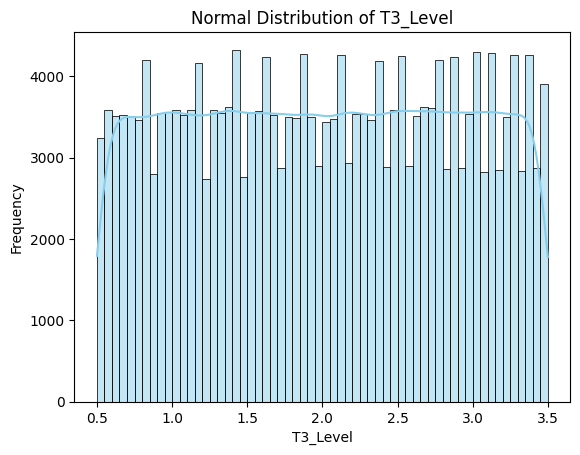

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(dataset["T3_Level"],kde=True, color='skyblue')

# Displaying the Normal Distribution of T3_Level
plt.title("Normal Distribution of T3_Level")
plt.xlabel("T3_Level")
plt.ylabel("Frequency")
plt.show()

-2.0671379627151948e-16

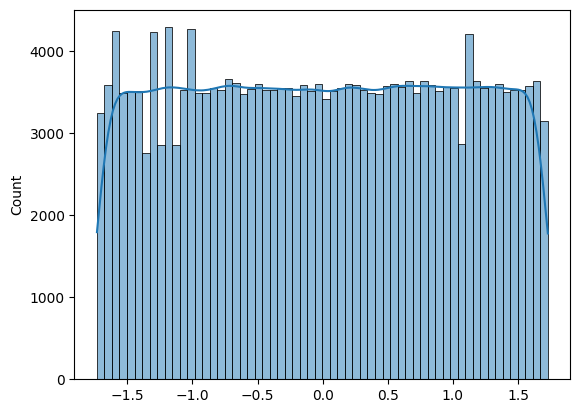

In [66]:
# Coverted to standard Normal Distribution

mean=dataset["T3_Level"].mean()
std=dataset["T3_Level"].std()
values=[i for i in dataset["T3_Level"]]
z_score=[((j-mean)/std) for j in values]
sns.histplot(z_score,kde=True)
sum(z_score)/len(z_score)


# 9. Probability Density Function

In [67]:
# 9) What is the probability Density Function of the Nodule_Size range from 2 to 4?

Mean=2.503, Standard Deviation=1.445
The area between range(2,4):0.5201992713174046


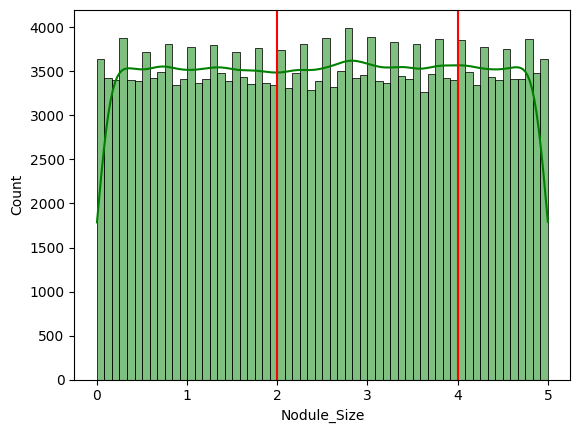

In [68]:
from matplotlib import pyplot
from scipy.stats import norm
ax = sns.histplot(dataset["Nodule_Size"],kde=True,color='Green')
pyplot.axvline(2,color='Red')
pyplot.axvline(4,color='Red')
# generate a sample
sample = dataset["Nodule_Size"]
# calculate parameters
sample_mean =sample.mean()
sample_std = sample.std()
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
# define the distribution
dist = norm(sample_mean, sample_std)
    
# sample probabilities for a range of outcomes
values = [value for value in range(2, 4)]
probabilities = [dist.pdf(value) for value in values]    
prob=sum(probabilities)
print("The area between range({},{}):{}".format(2,4,sum(probabilities)))

In [69]:
# The computed probability value (area under the curve) is approximately 0.52 (52%),
# meaning that around 52% of patients have nodule sizes between 2 and 4 units.The mean Nodule_Size was 2.50.

# 10. Performing Exploratory Data Analysis

# Q1) How many patients are diagnosed as Benign and Malignant?

Benign       163196
Malignant     49495
Name: Diagnosis, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17756\3962125365.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=dataset, palette='Set2')


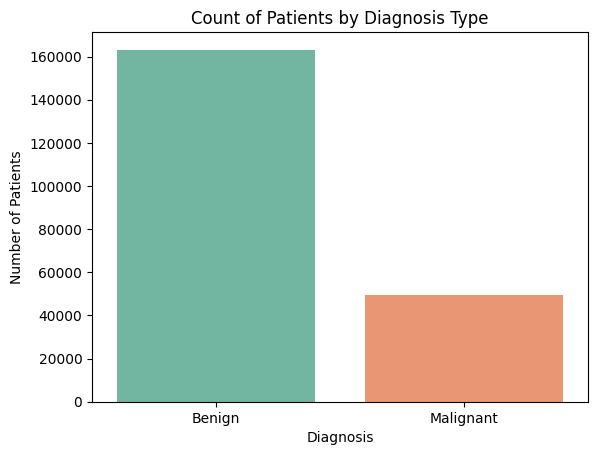

In [71]:
# Count of each diagnosis type
diagnosis_counts = dataset['Diagnosis'].value_counts()

# Display the counts
print(diagnosis_counts)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diagnosis', data=dataset, palette='Set2')
plt.title('Count of Patients by Diagnosis Type')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.show()


# Q2) What is the percentage of patients by Thyroid_Cancer_Risk type?

In [75]:
!pip install --upgrade kaleido

  Attempting uninstall: logistro
    Found existing installation: logistro 1.1.0
    Uninstalling logistro-1.1.0:
      Successfully uninstalled logistro-1.1.0
  Attempting uninstall: choreographer
    Found existing installation: choreographer 1.0.9
    Uninstalling choreographer-1.0.9:
      Successfully uninstalled choreographer-1.0.9
  Attempting uninstall: kaleido
    Found existing installation: kaleido 1.0.0
    Uninstalling kaleido-1.0.0:
      Successfully uninstalled kaleido-1.0.0


Low       50.960313
Medium    34.039992
High      14.999694
Name: Thyroid_Cancer_Risk, dtype: float64


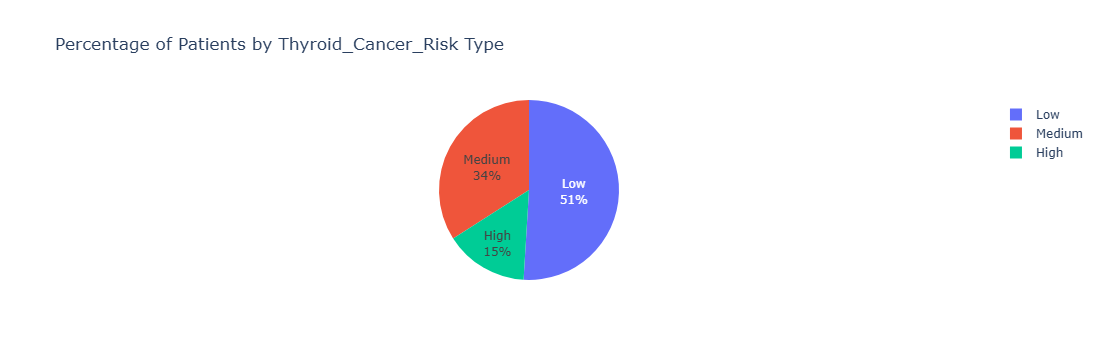

In [88]:
risk_percentage = dataset['Thyroid_Cancer_Risk'].value_counts(normalize=True) * 100
print(risk_percentage)

risk_df = risk_percentage.reset_index()
risk_df.columns = ['Thyroid_Cancer_Risk', 'Percentage']

# Plot pie chart

import plotly.express as px
import matplotlib.pyplot as plt
fig = px.pie(risk_df, names='Thyroid_Cancer_Risk', values='Percentage', color='Thyroid_Cancer_Risk',  
title='Percentage of Patients by Thyroid_Cancer_Risk Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show() 

# Q3) Display Top 10 patients with the highest Nodule Size?

In [90]:
dataset.sort_values(by='Nodule_Size',ascending=False).head(10) 

,Age,Gender,Country,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
24061,18,Male,USA,No,No,No,No,No,No,6.73,1.77,9.61,5.0,Low,Benign
98394,81,Female,Brazil,No,No,No,No,Yes,Yes,5.46,2.24,7.41,5.0,Low,Benign
20947,56,Female,China,Yes,No,No,No,Yes,No,3.04,1.56,8.21,5.0,Low,Benign
117145,34,Female,India,No,No,No,No,Yes,No,1.15,0.51,9.60,5.0,Low,Benign
47803,44,Female,China,No,No,No,No,No,No,4.35,3.07,5.71,5.0,Low,Malignant
57305,18,Male,Nigeria,Yes,No,Yes,Yes,No,No,3.22,3.50,5.10,5.0,High,Malignant
172015,60,Male,Russia,No,No,Yes,No,No,Yes,1.21,1.59,8.14,5.0,Medium,Benign
75226,88,Male,Brazil,No,No,Yes,No,Yes,No,3.83,0.65,8.91,5.0,Low,Malignant
183242,48,Female,South Korea,No,Yes,Yes,No,No,No,0.89,2.40,11.82,5.0,Low,Benign
110153,33,Male,Russia,No,No,Yes,No,No,No,4.88,0.81,7.55,5.0,Low,Benign


# Q4) Which patient from India has the largest Nodule Size?

In [91]:
india_patients = dataset[dataset['Country'] == 'India'] 
india_patients.sort_values(by='Nodule_Size',ascending=False).head(1) 

,Age,Gender,Country,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
68074,54,Male,India,No,No,No,No,Yes,No,5.52,2.39,8.79,5.0,Low,Benign


# 
Q5) Which countries have the highest TSH_Level for each Diagnosis type (Benign/Malignant)?

In [92]:
# Group by Diagnosis and Country, calculate average TSH level
tsh_country = (
    dataset.groupby(['Diagnosis', 'Country'])['TSH_Level']
    .mean()
    .reset_index()
    .sort_values(['Diagnosis', 'TSH_Level'], ascending=[True, False])
)

# Get top country for each diagnosis
top_tsh_country = tsh_country.groupby('Diagnosis').head(1)
print(top_tsh_country)


    Diagnosis Country  TSH_Level
0      Benign  Brazil   5.075435
14  Malignant   Japan   5.150928


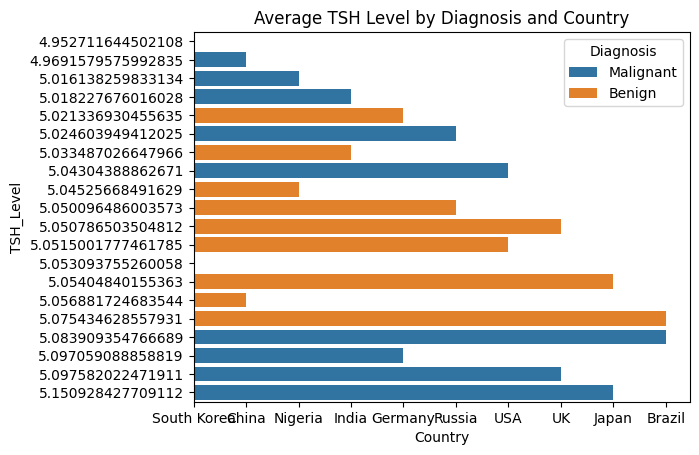

In [97]:
sns.barplot(
    data=tsh_country,
    x='Country',
    y='TSH_Level',
    hue='Diagnosis',
    orient='h'
)
plt.title('Average TSH Level by Diagnosis and Country')
plt.show()

# Q6) What is the average nodule size distribution of the high-Thyroid_Cancer_Risk for each Diagnosis type?

In [98]:
high_risk = dataset[dataset['Thyroid_Cancer_Risk'] == 'High']
avg_nodule_size = (
    high_risk.groupby('Diagnosis')['Nodule_Size']
    .mean()
    .reset_index()
    .sort_values('Nodule_Size', ascending=False)
)
print(avg_nodule_size)


   Diagnosis  Nodule_Size
0     Benign     2.506930
1  Malignant     2.498084


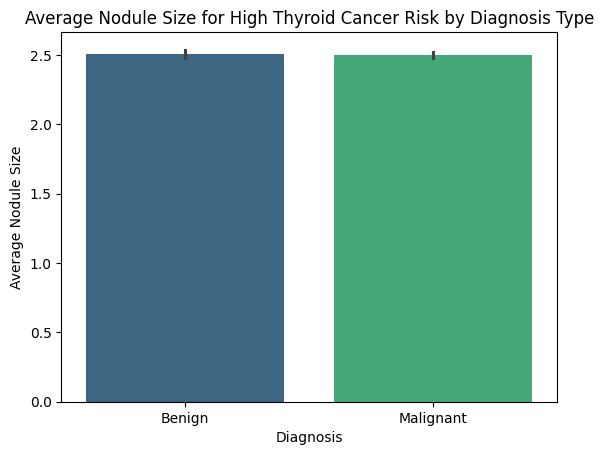

In [102]:
sns.barplot(
    data=high_risk,
    x='Diagnosis',
    y='Nodule_Size',
    estimator='mean',
    hue='Diagnosis',       # assign the x variable to hue
    palette='viridis'
)
plt.title('Average Nodule Size for High Thyroid Cancer Risk by Diagnosis Type')
plt.ylabel('Average Nodule Size')
plt.show()


# Q7) Which countries have the highest number of cases for each Diagnosis type?

In [105]:
# Group by Diagnosis and Country, and count how many cases in each group
case_counts = (
    dataset.groupby(['Diagnosis', 'Country'])
    .size()  # counts the number of rows per group
    .reset_index(name='Case_Count')
    .sort_values(['Diagnosis', 'Case_Count'], ascending=[True, False])
)
print(case_counts)


    Diagnosis      Country  Case_Count
3      Benign        India       28520
1      Benign        China       25280
5      Benign      Nigeria       25206
0      Benign       Brazil       16934
6      Benign       Russia       16790
4      Benign        Japan       13388
7      Benign  South Korea       11882
9      Benign          USA        8439
8      Benign           UK        8417
2      Benign      Germany        8340
13  Malignant        India       13976
15  Malignant      Nigeria        6712
11  Malignant        China        6698
16  Malignant       Russia        4507
10  Malignant       Brazil        4479
14  Malignant        Japan        3479
17  Malignant  South Korea        3083
18  Malignant           UK        2225
12  Malignant      Germany        2217
19  Malignant          USA        2119


In [106]:
top_countries = case_counts.groupby('Diagnosis').head(2)
print(top_countries)


    Diagnosis  Country  Case_Count
3      Benign    India       28520
1      Benign    China       25280
13  Malignant    India       13976
15  Malignant  Nigeria        6712


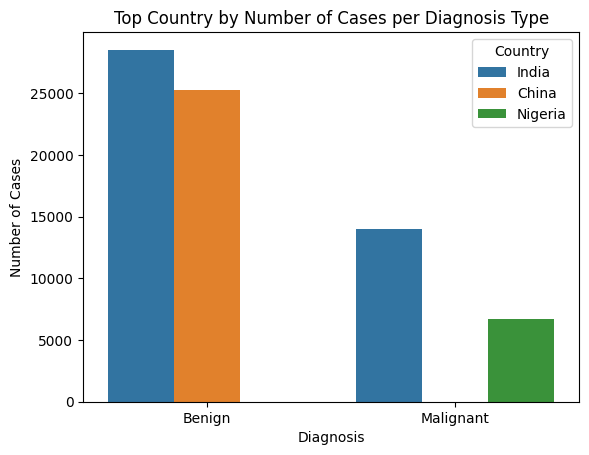

In [107]:
sns.barplot(
    data=top_countries,
    x='Diagnosis',
    y='Case_Count',
    hue='Country'
)
plt.title('Top Country by Number of Cases per Diagnosis Type')
plt.ylabel('Number of Cases')
plt.show()


# Q8) Is there a relationship between Smoking and Thyroid Cancer Risk?

In [109]:
# Count how many patients per Smoking–Risk group
grouped = (
    dataset.groupby(['Smoking', 'Thyroid_Cancer_Risk'])
    .size()
    .reset_index(name='Count')
)
print(grouped.head())


  Smoking Thyroid_Cancer_Risk  Count
0      No                High  25534
1      No                 Low  86658
2      No              Medium  58068
3     Yes                High   6369
4     Yes                 Low  21730


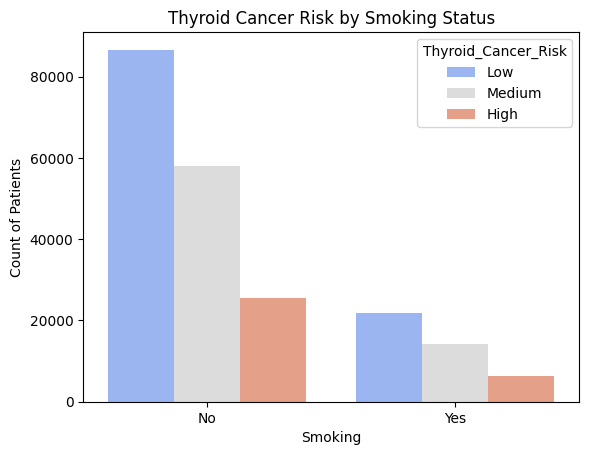

In [110]:
sns.countplot(
    data=dataset,
    x='Smoking',
    hue='Thyroid_Cancer_Risk',
    palette='coolwarm'
)
plt.title('Thyroid Cancer Risk by Smoking Status')
plt.ylabel('Count of Patients')
plt.show()

# Q9) Is there a relationship between Obesity and Thyroid Cancer Risk?

In [112]:
obesity_risk = (
    dataset.groupby(['Obesity', 'Thyroid_Cancer_Risk'])
    .size()
    .reset_index(name='Count')
)
print(obesity_risk.head())


  Obesity Thyroid_Cancer_Risk  Count
0      No                High  22430
1      No                 Low  75766
2      No              Medium  50609
3     Yes                High   9473
4     Yes                 Low  32622


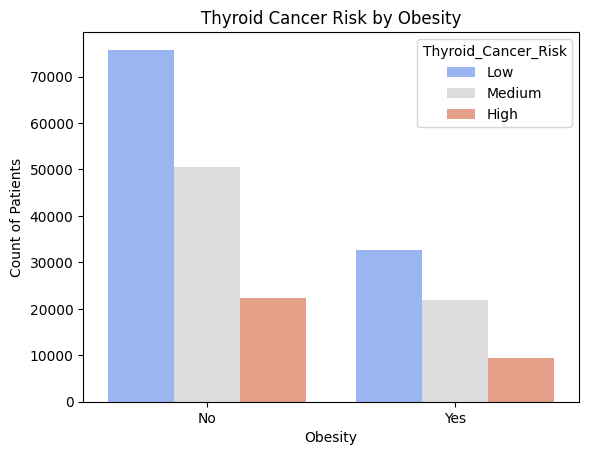

In [113]:
sns.countplot(
    data=dataset,
    x='Obesity',
    hue='Thyroid_Cancer_Risk',
    palette='coolwarm'
)
plt.title('Thyroid Cancer Risk by Obesity')
plt.ylabel('Count of Patients')
plt.show()

# Q10) Is there a relationship between Iodine Deficiency and Thyroid Cancer Risk?

In [118]:
Iodine_def = (
    dataset.groupby(['Iodine_Deficiency', 'Thyroid_Cancer_Risk'])
    .size()
    .reset_index(name='Count')
)
print(Iodine_def.head())

  Iodine_Deficiency Thyroid_Cancer_Risk  Count
0                No                High  16846
1                No                 Low  85630
2                No              Medium  57197
3               Yes                High  15057
4               Yes                 Low  22758


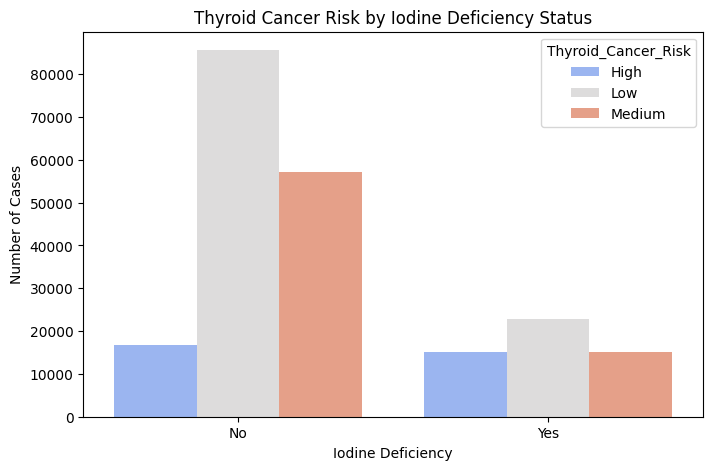

In [119]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=Iodine_def,
    x='Iodine_Deficiency',
    y='Count',
    hue='Thyroid_Cancer_Risk',
    palette='coolwarm'
)
plt.title('Thyroid Cancer Risk by Iodine Deficiency Status')
plt.ylabel('Number of Cases')
plt.xlabel('Iodine Deficiency')
plt.show()
